<a href="https://colab.research.google.com/github/eldhosejoseph/thesis/blob/main/thesis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

word link: https://essexuniversity-my.sharepoint.com/:w:/r/personal/ej23373_essex_ac_uk/_layouts/15/doc2.aspx?sourcedoc=%7B662A4E77-C405-427C-B638-3BE77C26C15D%7D&file=Datasets.docx&action=default&mobileredirect=true&DefaultItemOpen=1&ct=1716458088490&wdOrigin=OFFICECOM-WEB.MAIN.REC&cid=0d27486e-018b-4bd5-9607-f62c8b155336&wdPreviousSessionSrc=HarmonyWeb&wdPreviousSession=f2e85dc2-29a6-4d10-932d-14c7c8a07a5c

====================Open Neuro===================================

https://openneuro.org/datasets/ds004511/versions/1.0.2

git: https://github.com/OpenNeuroDatasets/ds004511.git

====================Dryad========================================= [Data from: A novel algorithm to enhance P300 in single trials: application to lie detection using F-score and SVM] : https://datadryad.org/stash/dataset/doi:10.5061/dryad.2qc64

paper: https://doi.org/10.1371/journal.pone.0109700

=======An EEG Dataset of Neural Signatures in a Competitive Two-Player Game Encouraging Deceptive Behavior============================

Paper: https://www.nature.com/articles/s41597-024-03234-y :An EEG Dataset of Neural Signatures in a Competitive Two-Player Game Encouraging Deceptive Behavior

Dataset: https://figshare.com/articles/dataset/An_EEG_Dataset_of_Neural_Signatures_in_a_Competitive_Two-Player_Game_Encouraging_Deceptive_Behavior/24760827/3

git: https://github.com/yiyuchen-lab/DeceptionGame

==========LieWaves: dataset for lie detection based on EEG signals and wavelets===

Paper: https://link.springer.com/article/10.1007/s11517-024-03021-2 : LieWaves: dataset for lie detection based on EEG signals and wavelets

Dataset: [https://data.mendeley.com/datasets/5gzxb2bzs2/2]

## Libraries and Packages

In [1]:
!pip install mne

In [2]:
import mne
import os
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Competitive Two Player Game- Deception Task

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Path to the .mat file within a folder in Google Drive
mat_file_path = '/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/Preprocessed/Preprocessed/DecisionMaking/Player_sub01_Observer_sub02.mat'

# Load the .mat file
mat_contents = loadmat(mat_file_path)

In [5]:
#behavioral log data
beh_log=pd.read_csv("/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/behavioral log and trigger timestamp/Player_sub01_Observer_sub02_Behavioral.txt", sep=" ", header=1, index_col=None)
beh_log

round trial  trial_type  card_num card_col(Blk[1]/Pur[2]/Blu[3])  \
1       1     L           3         3                            lie   
1       2     T           4         2                           true   
1       3     S           1         1                            lie   
1       4     S           4         1                           true   
1       5     S           4         1                           true   
..    ...   ...         ...       ...                            ...   
11     40     L           3         3                            lie   
11     41     L           3         3                            lie   
11     42     S           3         1                           true   
11     43     T           3         2                           true   
11     44     S           6         1                           true   

    player_response  player_input Obs_input(Lie[0]/Truth[1])   score  \
1                 4             0                      ['0',  '+10']   
1                 4             1                     ['+5',  '+10']   
1                 2             1                    ['+10',    '0']   
1                 4             1                     ['+5',  '+10']   
1                 4             0                     ['+5',    '0']   
..              ...           ...                        ...     ...   
11                4             0                      ['0',  '+10']   
11                4             1                    ['+10',    '0']   
11                3             0                     ['+5',    '0']   
11                3             1                     ['+5',  '+10']   
11                6             1                     ['+5',  '+10']   

     sub_rea   obs_rea  
1   2.060804  0.899339  
1   1.354787  0.482807  
1   0.932352  0.499496  
1   0.868851  1.166404  
1   0.980639  0.399647  
..       ...       ...  
11  0.933398  0.232951  
11  0.784780  0.232735  
11  0.650696  0.232914  
11  0.735949  0.232397  
11  0.872087  0.232451  

[484 rows x 11 columns]

In [6]:
#formating the above table correctly
m=44
n=range(1,12)
s=[num for num in n for _ in range(m)]
s[43]
data={
    'round':list(s),
    'trial':beh_log['round'],
    'trial_type':beh_log['trial'],
    'card_num':beh_log['trial_type'],
    'card_col(Blk[1]/Pur[2]/Blu[3])':beh_log['card_num'],
    'player_response':beh_log['card_col(Blk[1]/Pur[2]/Blu[3])'],
    'player_input':beh_log['player_response'],
    'Obs_input(Lie[0]/Truth[1])':beh_log['player_input'],
    'score_1':beh_log['Obs_input(Lie[0]/Truth[1])'],
    'score_2':beh_log['score'],
    'sub_rea':beh_log['sub_rea'],
    'obs_rea':beh_log['obs_rea']

}
beh_log_upd=pd.DataFrame(data, index=None)
beh_log_upd

round  trial trial_type  card_num  card_col(Blk[1]/Pur[2]/Blu[3])  \
1       1      1          L         3                               3   
1       1      2          T         4                               2   
1       1      3          S         1                               1   
1       1      4          S         4                               1   
1       1      5          S         4                               1   
..    ...    ...        ...       ...                             ...   
11     11     40          L         3                               3   
11     11     41          L         3                               3   
11     11     42          S         3                               1   
11     11     43          T         3                               2   
11     11     44          S         6                               1   

   player_response  player_input  Obs_input(Lie[0]/Truth[1])  score_1 score_2  \
1              lie             4                           0    ['0',  '+10']   
1             true             4                           1   ['+5',  '+10']   
1              lie             2                           1  ['+10',    '0']   
1             true             4                           1   ['+5',  '+10']   
1             true             4                           0   ['+5',    '0']   
..             ...           ...                         ...      ...     ...   
11             lie             4                           0    ['0',  '+10']   
11             lie             4                           1  ['+10',    '0']   
11            true             3                           0   ['+5',    '0']   
11            true             3                           1   ['+5',  '+10']   
11            true             6                           1   ['+5',  '+10']   

     sub_rea   obs_rea  
1   2.060804  0.899339  
1   1.354787  0.482807  
1   0.932352  0.499496  
1   0.868851  1.166404  
1   0.980639  0.399647  
..       ...       ...  
11  0.933398  0.232951  
11  0.784780  0.232735  
11  0.650696  0.232914  
11  0.735949  0.232397  
11  0.872087  0.232451  

[484 rows x 12 columns]

In [7]:
#timestamp data
timestamp_log=pd.read_fwf("/content/drive/MyDrive/thesisdata/eegdataset/24760827eeg/behavioral log and trigger timestamp/Player_sub01_Observer_sub02_Timestamp.txt",sep=" ", header=None)
timestamp_log

0                1  \
0     2018-08-30  14:56:39.321000   
1     2018-08-30  14:56:41.310000   
2     2018-08-30  14:56:41.664000   
3     2018-08-30  14:56:41.673000   
4     2018-08-30  14:56:52.459000   
...          ...              ...   
3946  2018-08-30  16:11:52.178000   
3947  2018-08-30  16:11:53.221000   
3948  2018-08-30  16:11:54.337000   
3949  2018-08-30  16:11:55.379000   
3950  2018-08-30  16:11:59.498000   

                                                  2  
0                      25.2757729933 init_cedruspad  
1                    27.2635283424 experiment_start  
2                             27.6184087797 welcome  
3                        27.6273959005 assignDevice  
4                         38.4134304448 colorScheme  
...                                             ...  
3946  4538.17704899 result_trial_observer_incorrect  
3947        4539.22062448 result_trial_point_status  
3948        4540.33624361 result_round_observer_win  
3949        4541.37831381 result_final_observer_win  
3950                   4545.49728022 experiment_end  

[3951 rows x 3 columns]

In [9]:
##formating the above table correctly

# Split the specific column
split_data = timestamp_log[2].str.split(' ', n=1, expand=True)

# Rename the split columns
split_data.columns = ['2', '3']

# Concatenate the original DataFrame with the split columns
timestamp_log_n=timestamp_log
timestamp_log_n.drop(columns=[2], inplace=True)
timestamp_log_upd = pd.concat([timestamp_log_n, split_data], axis=1)
timestamp_log_upd

0                1              2  \
0     2018-08-30  14:56:39.321000  25.2757729933   
1     2018-08-30  14:56:41.310000  27.2635283424   
2     2018-08-30  14:56:41.664000  27.6184087797   
3     2018-08-30  14:56:41.673000  27.6273959005   
4     2018-08-30  14:56:52.459000  38.4134304448   
...          ...              ...            ...   
3946  2018-08-30  16:11:52.178000  4538.17704899   
3947  2018-08-30  16:11:53.221000  4539.22062448   
3948  2018-08-30  16:11:54.337000  4540.33624361   
3949  2018-08-30  16:11:55.379000  4541.37831381   
3950  2018-08-30  16:11:59.498000  4545.49728022   

                                    3  
0                      init_cedruspad  
1                    experiment_start  
2                             welcome  
3                        assignDevice  
4                         colorScheme  
...                               ...  
3946  result_trial_observer_incorrect  
3947        result_trial_point_status  
3948        result_round_observer_win  
3949        result_final_observer_win  
3950                   experiment_end  

[3951 rows x 4 columns]

In [10]:
# Print the content keys
print("Keys in the .mat file:", mat_contents.keys())

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'observer', 'player'])


In [11]:
# Print the keys and their corresponding values
for key in mat_contents:
    print(key, mat_contents[key])

__header__ b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 20 12:39:53 2020'
__version__ 1.0
__globals__ []
observer [[(array([[100]], dtype=uint8), array([[[11.73809814, -4.60339928,  4.1760745 , ...,  0.59059244,
            0.2064213 , -1.19021237],
          [ 1.55382347, -1.90759599,  2.51351094, ..., -1.73174858,
           -2.85086083, -3.78615451],
          [-0.85164458, -1.35440552,  4.06248808, ..., -4.89755106,
            0.91994894, -5.00700808],
          ...,
          [10.25300503, -3.13702965,  3.23399067, ..., -0.61560994,
            2.02332449,  3.43227458],
          [ 4.66026926, -2.12385416, -2.50135303, ..., -2.22989058,
            1.84405303,  1.1173979 ],
          [ 2.73948503, -2.3559866 ,  0.86950058, ..., -2.08339524,
           -0.79820997, -1.3509593 ]],

         [[ 9.63358402, -3.44134283,  5.94707727, ..., -1.9969213 ,
            4.99834871,  3.29911351],
          [ 1.49707007, -0.85923916, -0.60340232, ..., -5.23727417,
            

In [12]:
mat_contents['observer']

array([[(array([[100]], dtype=uint8), array([[[11.73809814, -4.60339928,  4.1760745 , ...,  0.59059244,
                  0.2064213 , -1.19021237],
                [ 1.55382347, -1.90759599,  2.51351094, ..., -1.73174858,
                 -2.85086083, -3.78615451],
                [-0.85164458, -1.35440552,  4.06248808, ..., -4.89755106,
                  0.91994894, -5.00700808],
                ...,
                [10.25300503, -3.13702965,  3.23399067, ..., -0.61560994,
                  2.02332449,  3.43227458],
                [ 4.66026926, -2.12385416, -2.50135303, ..., -2.22989058,
                  1.84405303,  1.1173979 ],
                [ 2.73948503, -2.3559866 ,  0.86950058, ..., -2.08339524,
                 -0.79820997, -1.3509593 ]],

               [[ 9.63358402, -3.44134283,  5.94707727, ..., -1.9969213 ,
                  4.99834871,  3.29911351],
                [ 1.49707007, -0.85923916, -0.60340232, ..., -5.23727417,
                  1.41069198,  2.57719851],
   

In [13]:
mat_contents['player']

array([[(array([[100]], dtype=uint8), array([[[-7.18764830e+00,  1.22919858e+00,  1.81678867e+00, ...,
                 -3.17998007e-02,  7.14602321e-03,  4.38691902e+00],
                [-6.71852255e+00,  1.22490931e+00,  2.86546040e+00, ...,
                  7.31438875e-01,  1.42970324e+00,  6.39665174e+00],
                [-5.53971100e+00, -1.23877919e+00,  7.66455460e+00, ...,
                  8.11694801e-01, -1.58020723e+00,  4.86925459e+00],
                ...,
                [-3.65176725e+00, -9.83069777e-01,  7.05432653e+00, ...,
                 -3.05836296e+00, -2.73539591e+00,  4.22301978e-01],
                [-4.28767014e+00, -6.27262235e-01,  3.57845688e+00, ...,
                 -2.18507266e+00,  2.50094247e+00,  1.80136287e+00],
                [-1.57916006e-02,  1.03468634e-02,  3.39718556e+00, ...,
                 -2.53226328e+00, -4.62264919e+00,  1.25445604e+00]],

               [[-5.54400253e+00, -1.55448639e+00, -3.51589417e+00, ...,
                 -5.55

In [14]:
observer_data=mat_contents['observer']
player_data=mat_contents['player']

In [15]:
#function to extract relevant eeg data
def eeg_data(data_arrays):
  # Flatten or reshape each sub-array as needed
  # Example: Extracting the EEG data and timestamps
  eeg_data = data_arrays[1]
  timestamps = data_arrays[5]

  # Create a DataFrame with the flattened data
  data_df = pd.DataFrame({
      'EEG_data': [eeg_data],
      'Timestamps': [timestamps]
  })
  return data_df
  # Display the DataFrame
  #print(data_df)

In [16]:
eeg_data(observer_data[0][0])

EEG_data  \
0  [[[11.73809814453125, -4.603399276733398, 4.17...   

                                          Timestamps  
0  [[-500, -490, -480, -470, -460, -450, -440, -4...

In [17]:
eeg_data(player_data[0][0])

EEG_data  \
0  [[[-7.187648296356201, 1.2291985750198364, 1.8...   

                                          Timestamps  
0  [[-500, -490, -480, -470, -460, -450, -440, -4...

In [18]:
#eeg heatmap

def eeg_heatmap(eeg_df):
  """

  Args:
    eeg_df:
  """
  # Extract EEG data and timestamps
  eeg_data = eeg_df.iloc[0][0]
  timestamps = eeg_df.iloc[0][1]

  # Reshape timestamps to match the shape of EEG data
  timestamps = np.squeeze(timestamps)

  # Plot EEG data
  plt.figure(figsize=(10, 6))
  plt.imshow(eeg_data[:, :, 0], aspect='auto', cmap='jet', extent=[timestamps[0], timestamps[-1], 0, 30])
  plt.colorbar(label='Amplitude')
  plt.xlabel('Time (ms)')
  plt.ylabel('Channel')
  plt.title('EEG Data')
  plt.show()

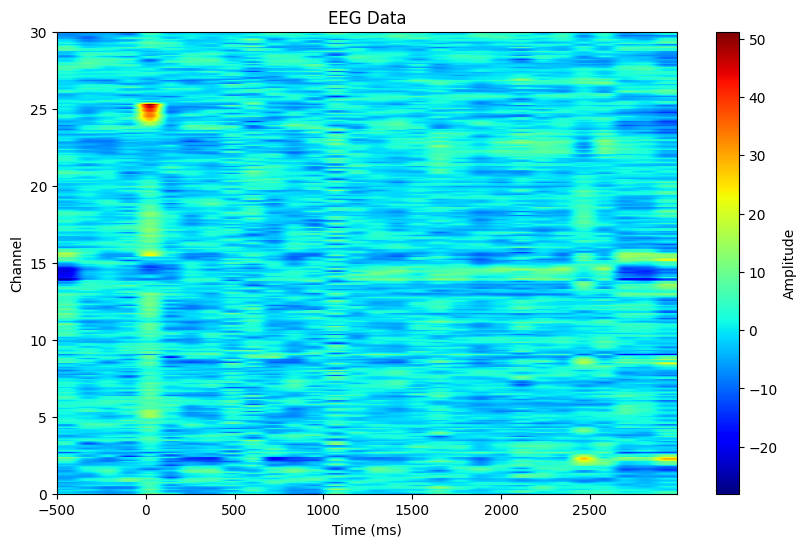

In [19]:
player_df=eeg_data(player_data[0][0])

eeg_heatmap(player_df)

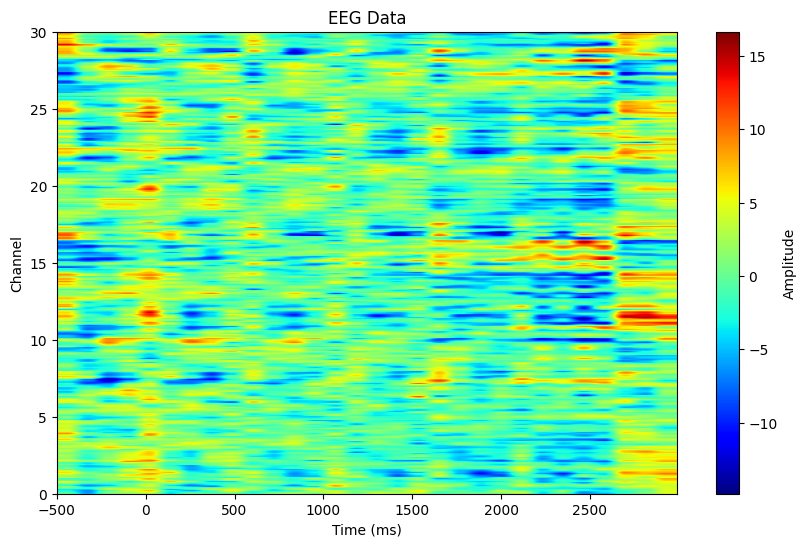

In [20]:
observer_df=eeg_data(observer_data[0][0])

eeg_heatmap(observer_df)

In [21]:


def eeg_channel(eeg_df, channel_num=0, subplots=0):
    # Extract EEG data and timestamps
    eeg_data = eeg_df.iloc[0][0]
    timestamps = eeg_df.iloc[0][1]

    # Reshape timestamps to match the shape of EEG data
    timestamps = np.squeeze(timestamps)

    # Plot EEG data for each channel separately
    if subplots==0:
      if (channel_num==0 or channel_num is None):
        num_channels = eeg_data.shape[1]
        plt.figure(figsize=(30, 15))
        for channel_idx in range(num_channels):
            plt.subplot(num_channels, 1, channel_idx + 1)
            plt.plot(timestamps, eeg_data[:, channel_idx, 0], color='b', linewidth=1)
            plt.xlabel('Time (ms)')
            plt.ylabel('Amplitude')
            plt.title(f'Channel {channel_idx + 1}')

        plt.tight_layout()
        plt.show()
      else:
        channel_idx = channel_num

        # Plot EEG data for the selected channel
        plt.figure(figsize=(10, 6))
        plt.plot(timestamps, eeg_data[:, channel_idx-1, 0], color='b', linewidth=1)
        plt.xlabel('Time (ms)')
        plt.ylabel('Amplitude')
        plt.title(f'EEG Data - Channel {channel_idx }')
        plt.grid(True)
        plt.show()

    else:
          # Define the number of rows and columns for subplots
      num_rows = 10
      num_cols = 3

      # Create a figure and subplots
      fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

      # Flatten the axes array for easy iteration
      axes = axes.flatten()

      # Plot EEG data for each channel
      for i in range(len(axes)):
          channel_idx = i  # Use i to select the channel for each subplot
          axes[i].plot(timestamps, eeg_data[:, channel_idx, 0], color='b', linewidth=1)
          axes[i].set_xlabel('Time (ms)')
          axes[i].set_ylabel('Amplitude')
          axes[i].set_title(f'Channel {channel_idx + 1}')
          axes[i].grid(True)

      # Adjust layout and display
      plt.tight_layout()
      plt.show()

**PLAYER EEG**

<ipython-input-21-c50d62728d91>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


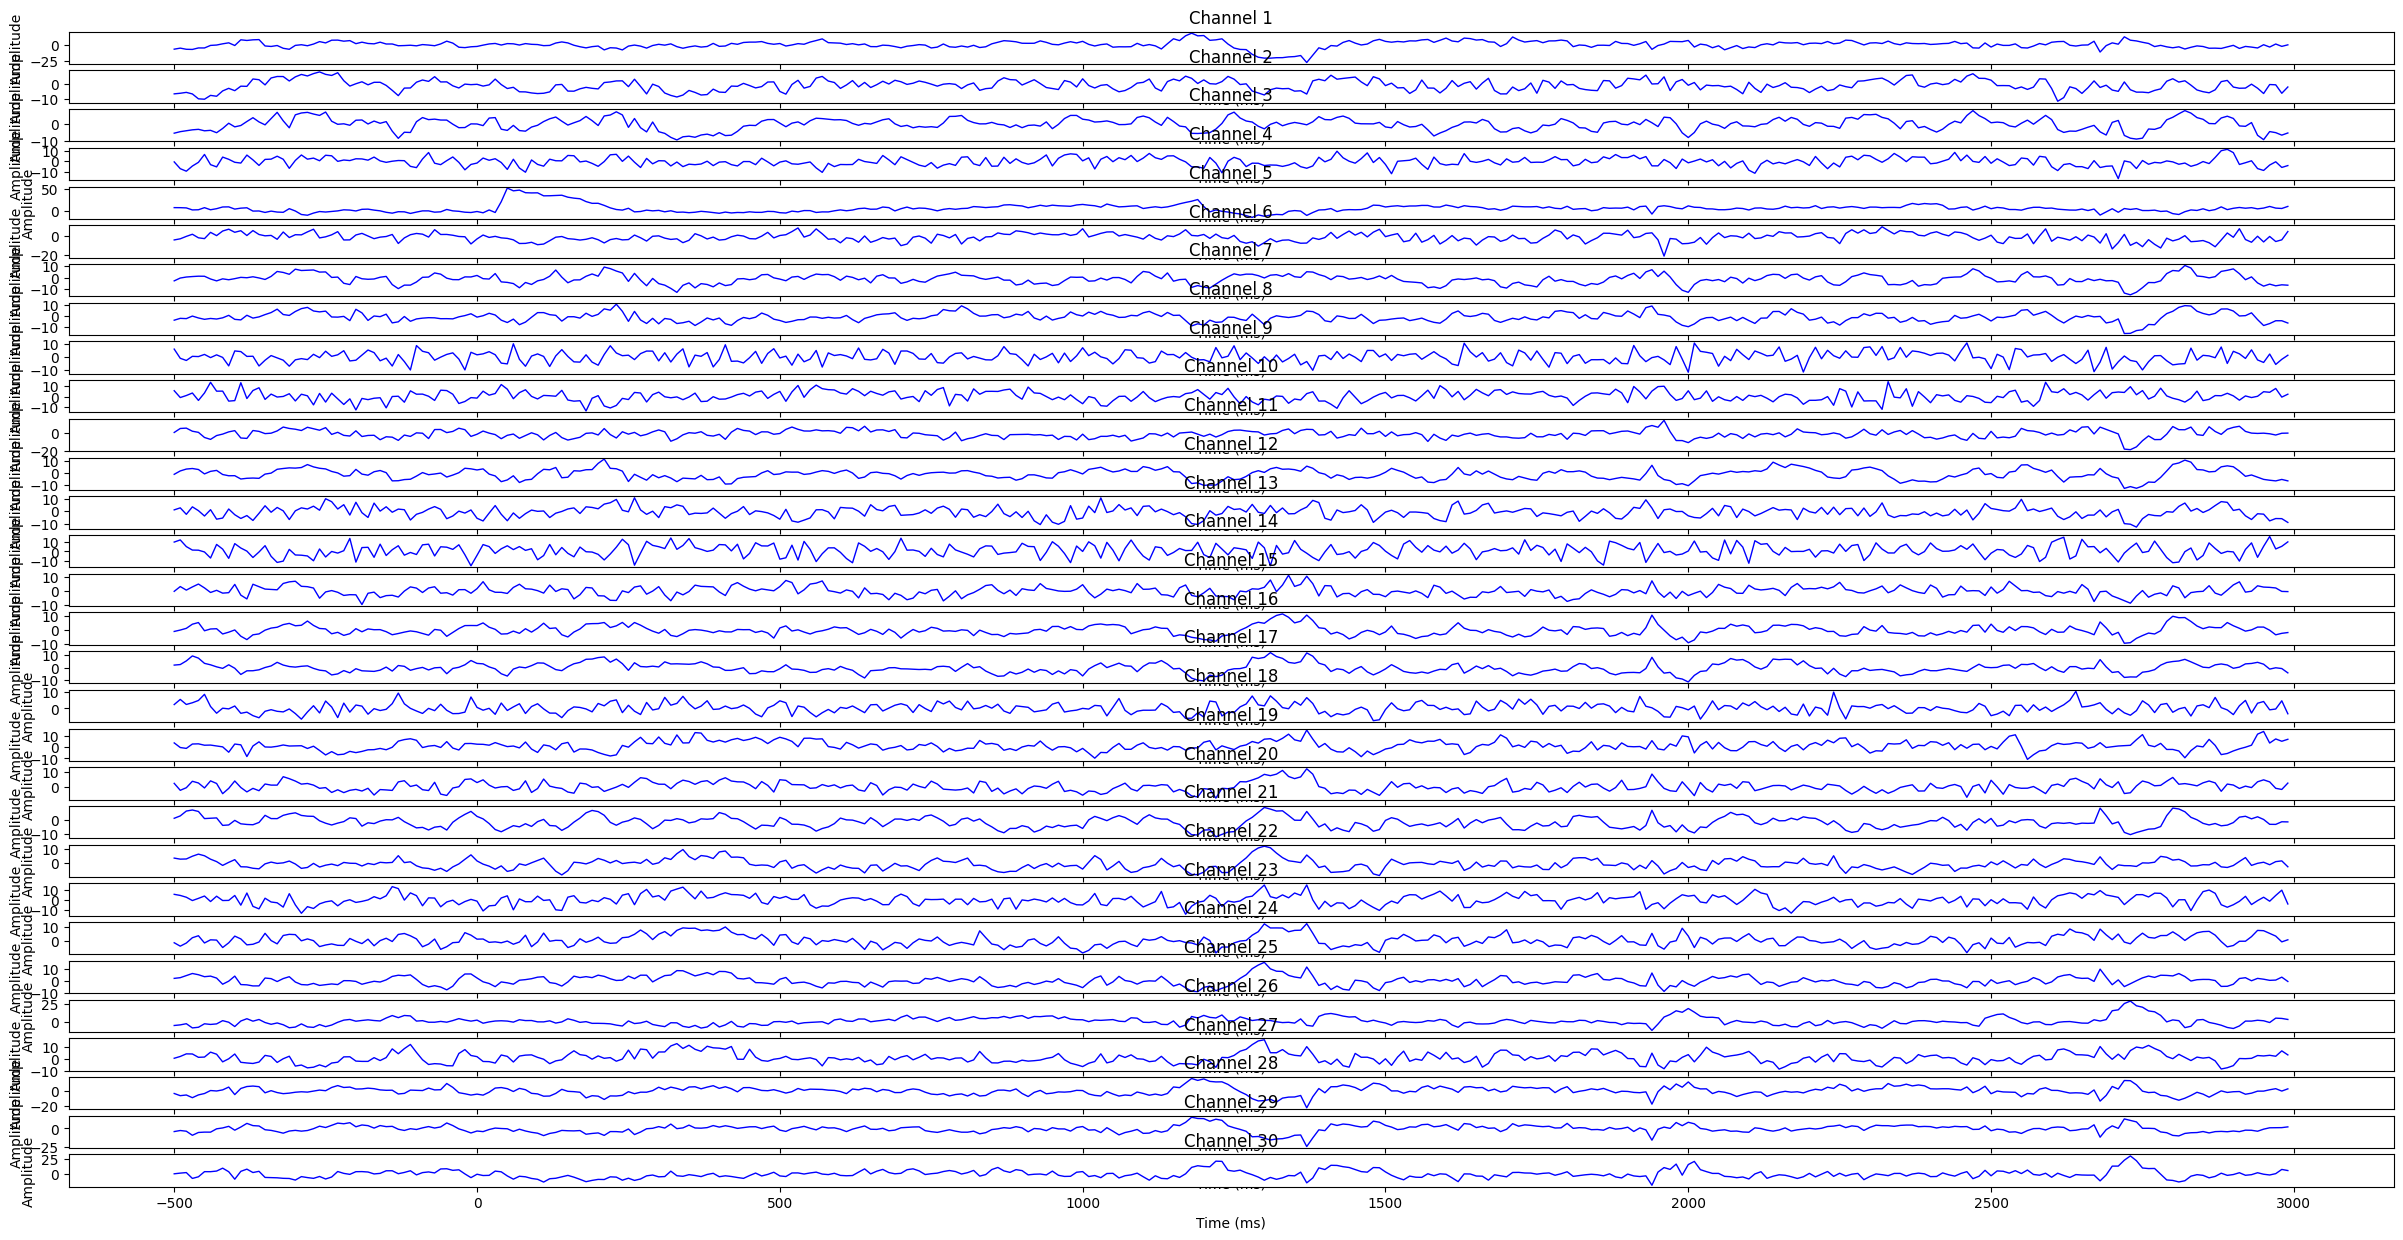

In [22]:
eeg_channel(player_df)

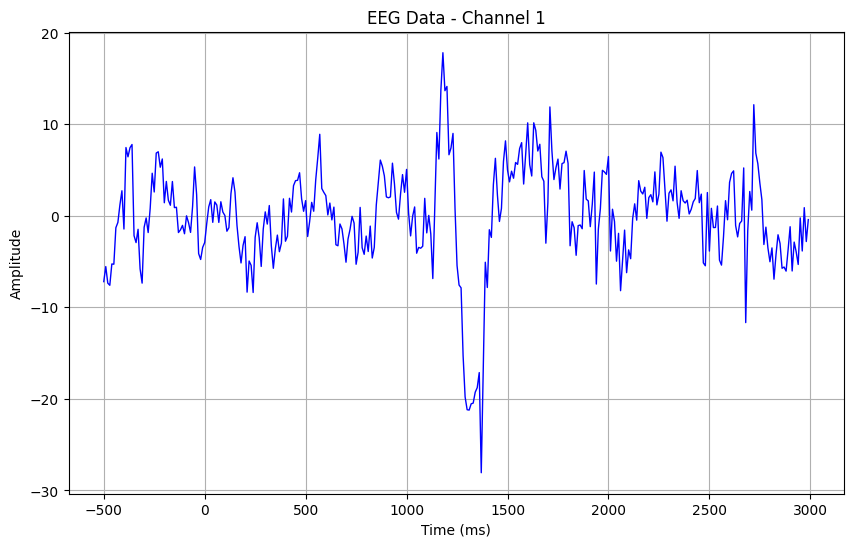

In [23]:
eeg_channel(player_df, 1)

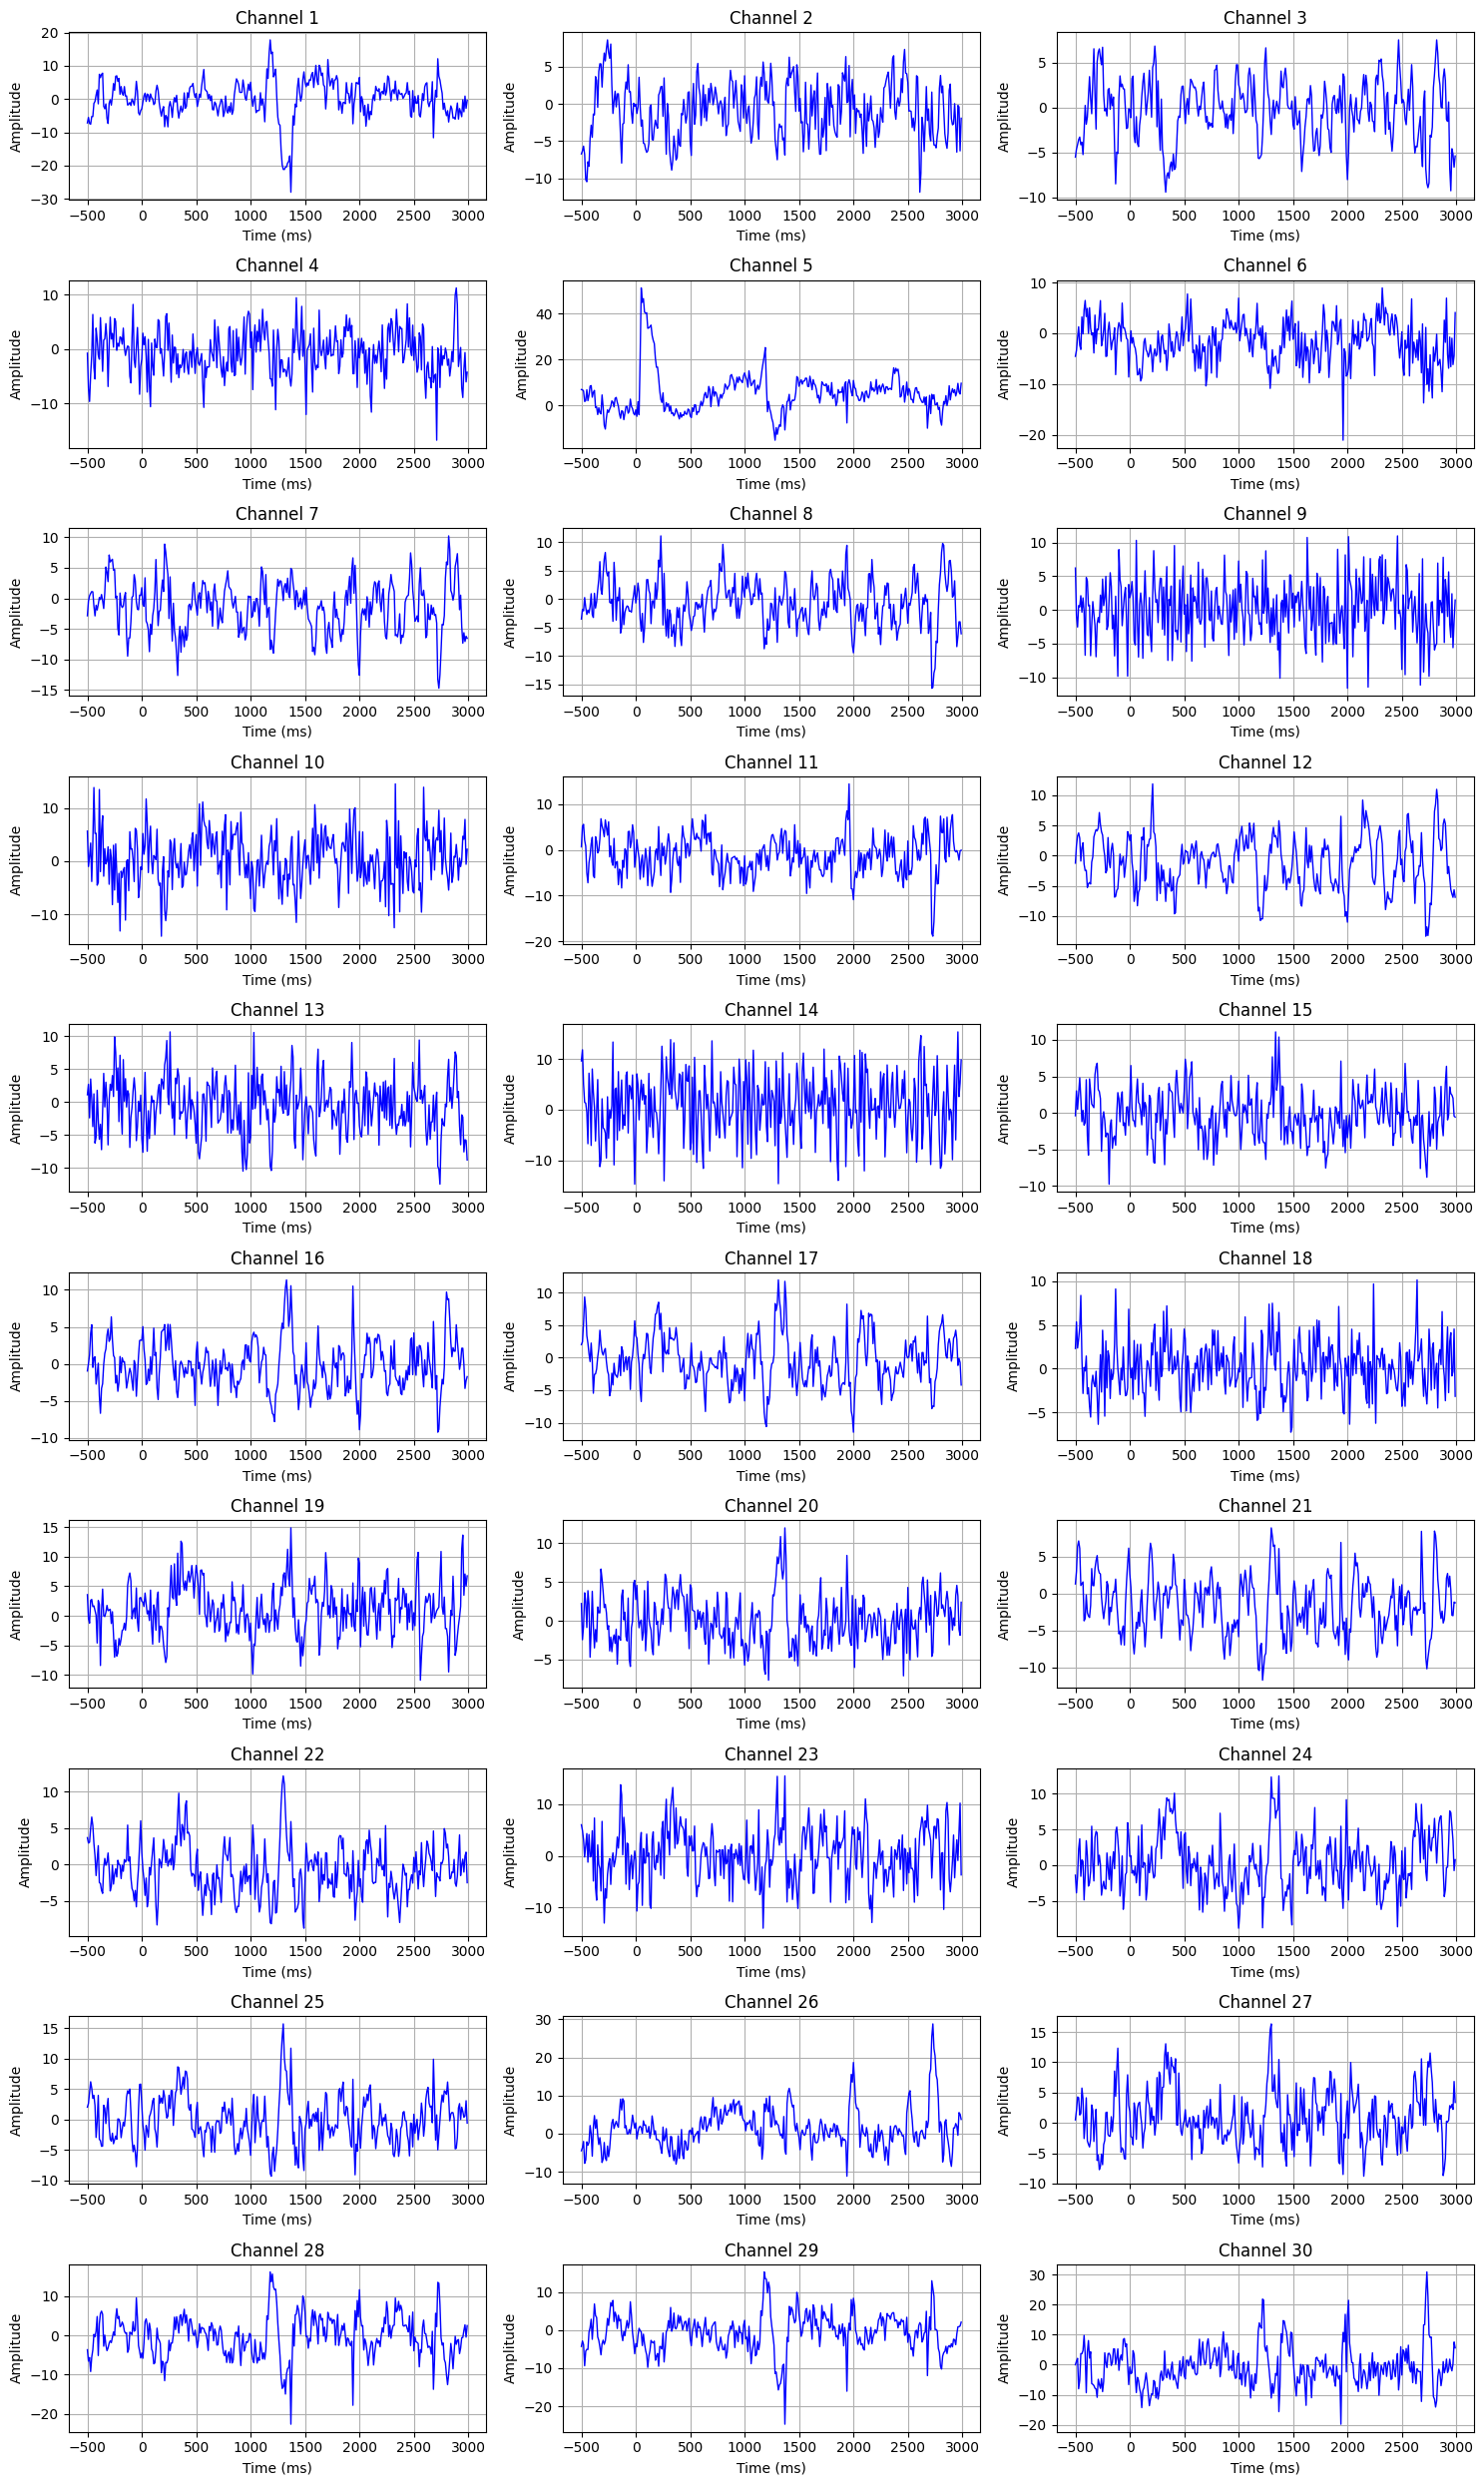

In [24]:
eeg_channel(player_df, subplots=1)

**OBSERVER EEG**

<ipython-input-21-c50d62728d91>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


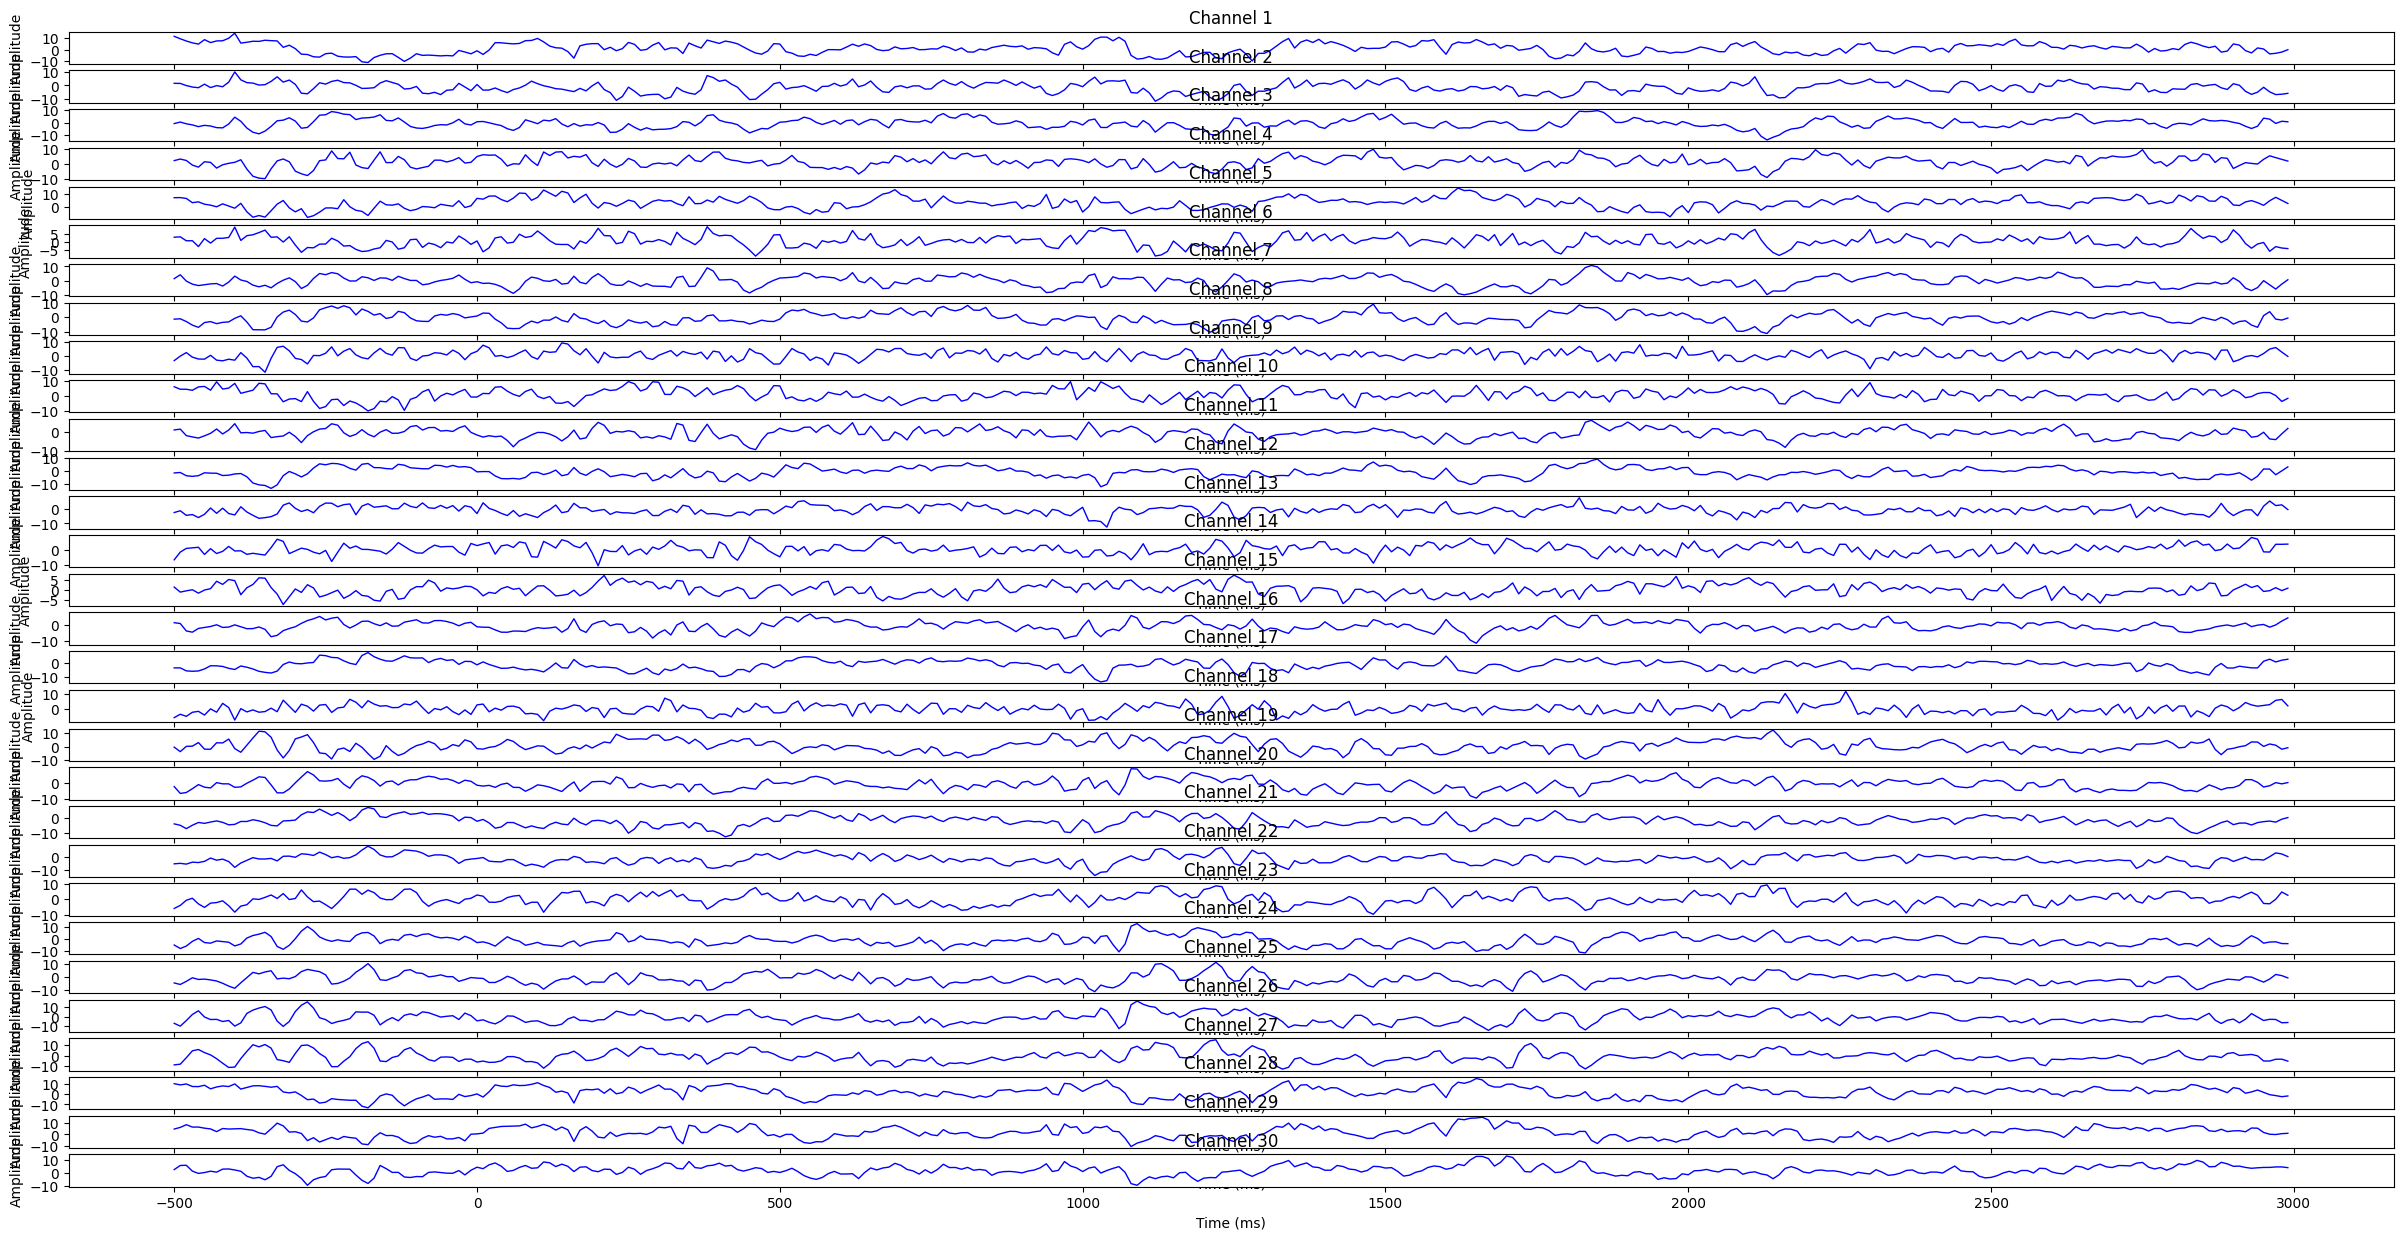

In [25]:
eeg_channel(observer_df)

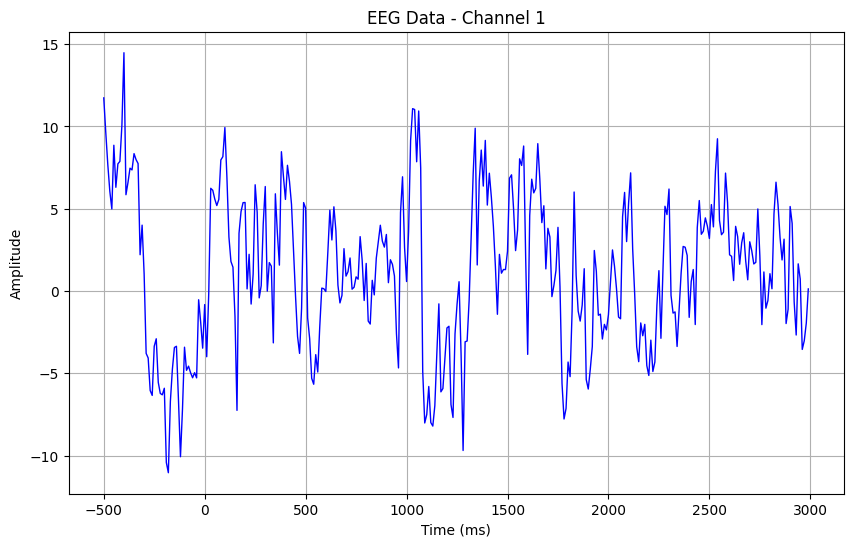

In [26]:
eeg_channel(observer_df,1)


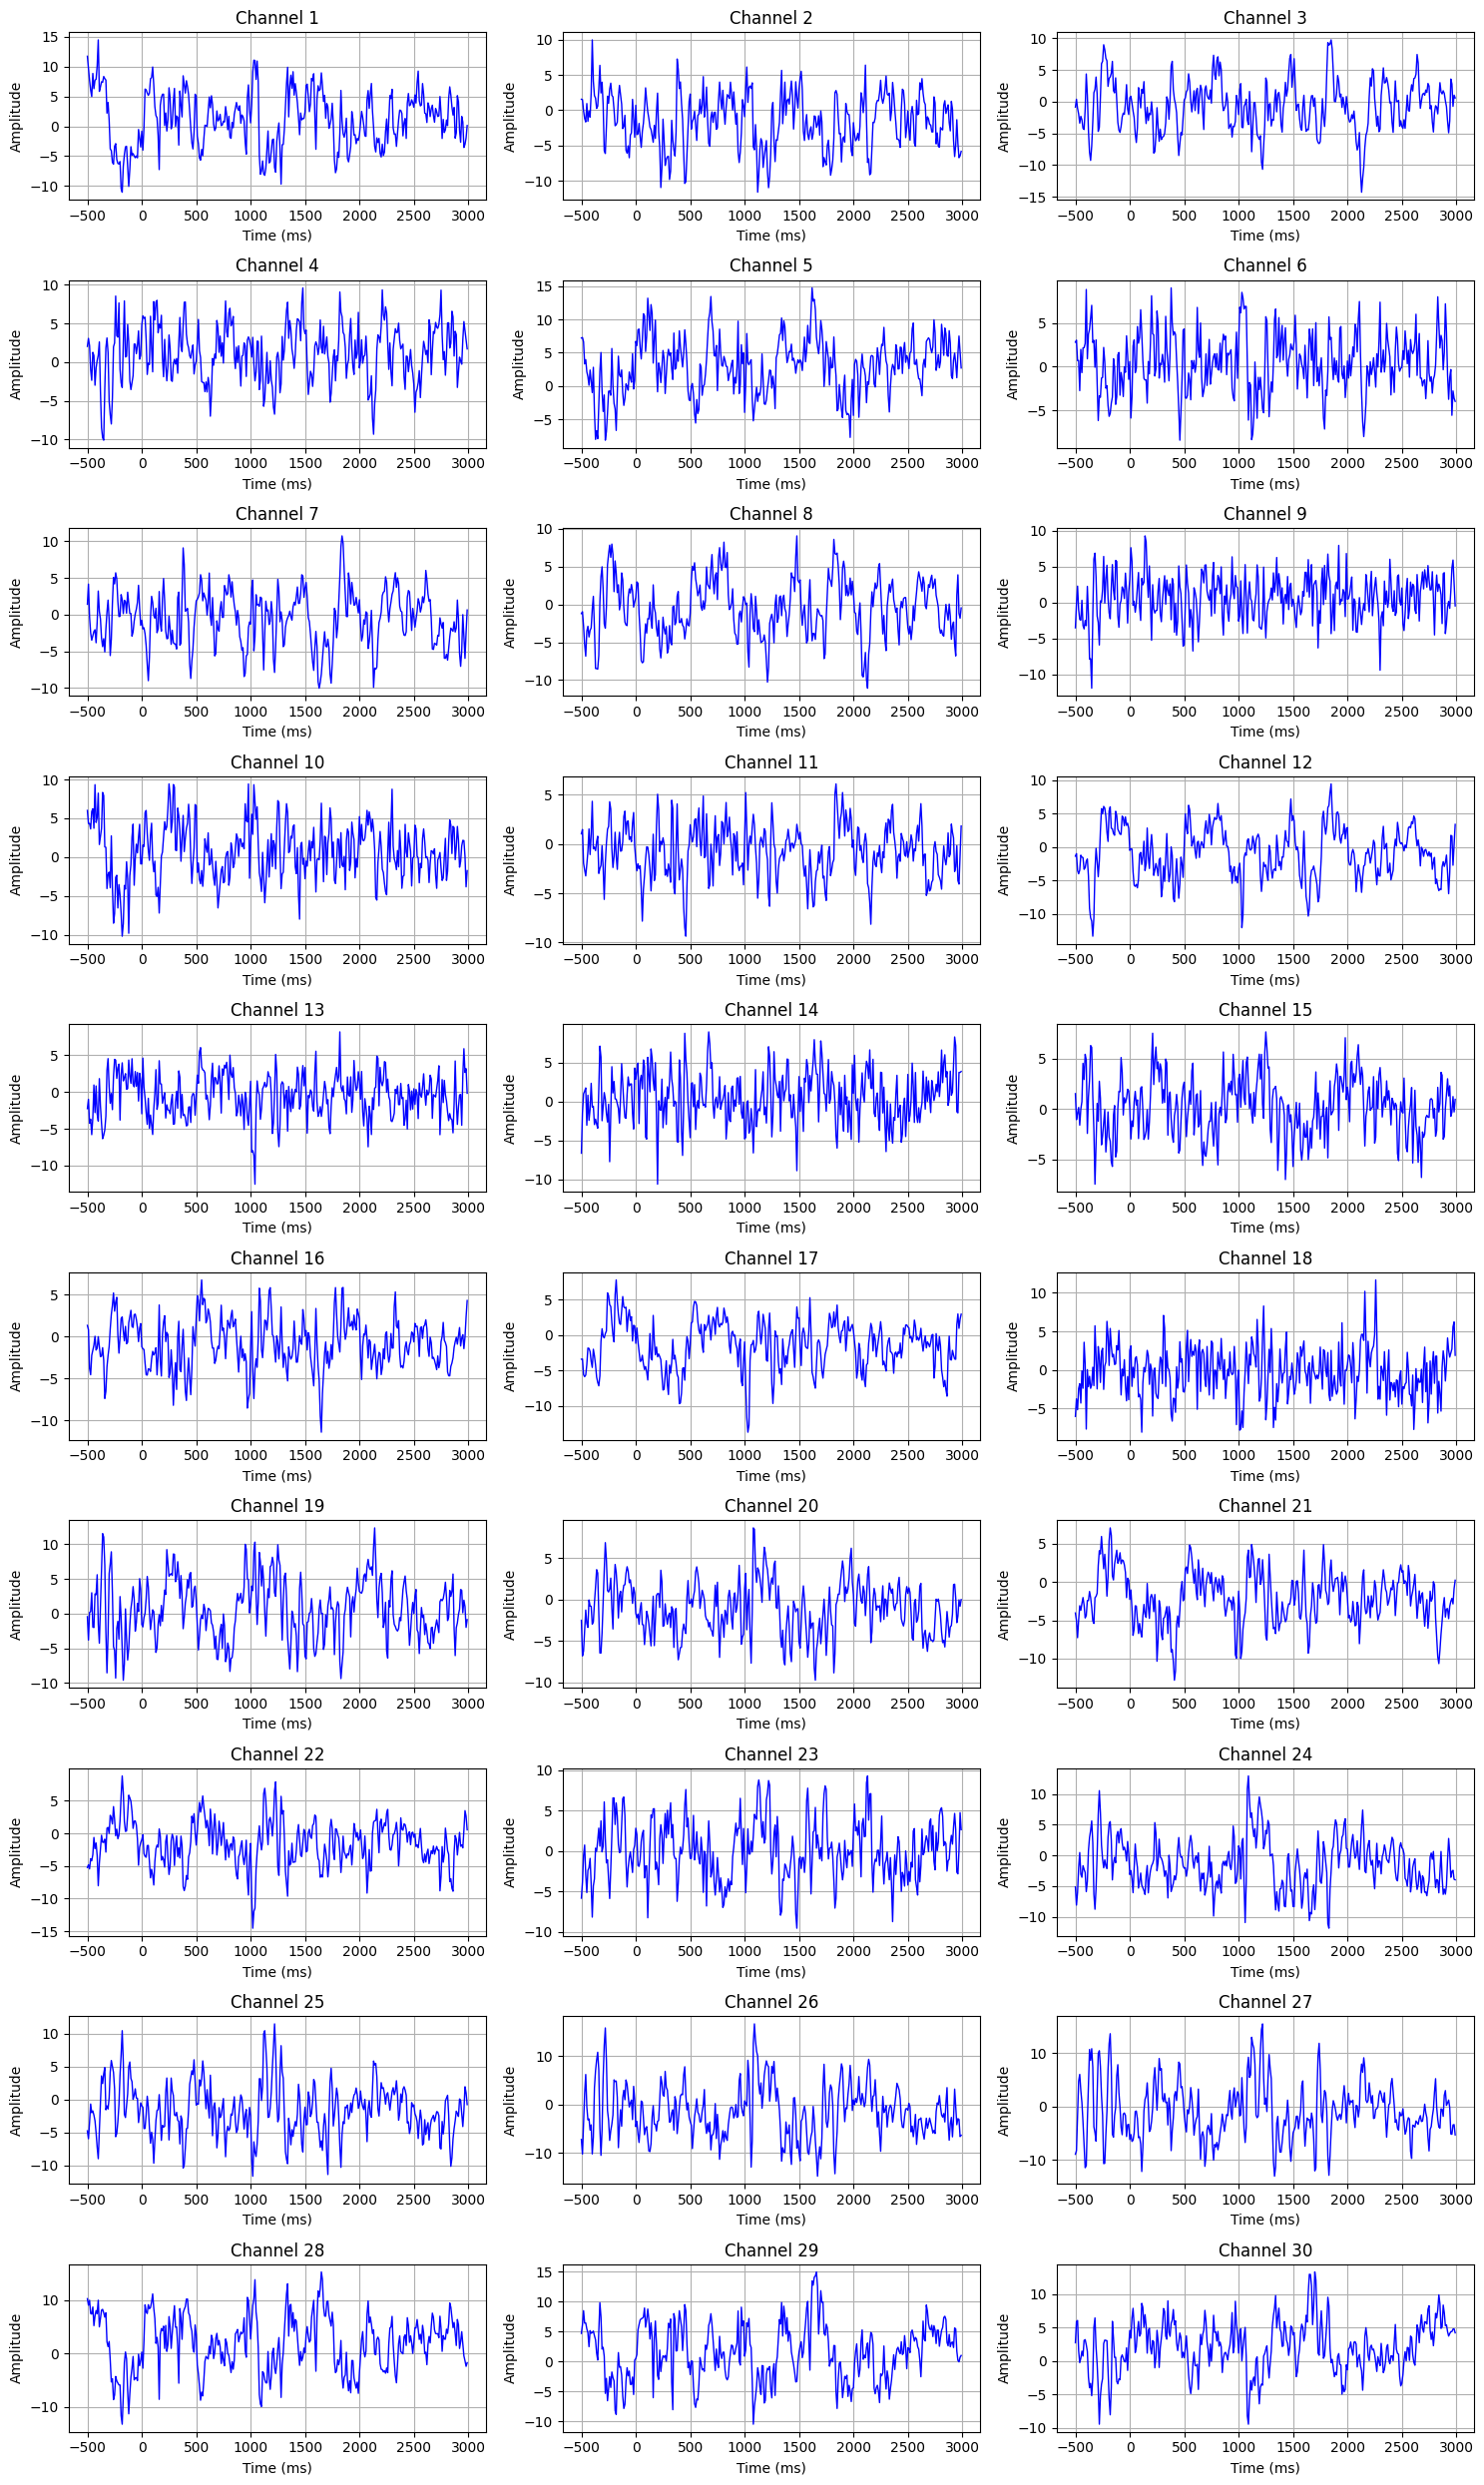

In [27]:
eeg_channel(observer_df, subplots=1)
